In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [44]:
x1 = 2*np.random.rand(100,1)
y = 3*x1 + np.random.randn(100,1)

print(x1.shape)
print(x1[0:10])
print(y[0:10])

(100, 1)
[[1.10625896]
 [1.73502223]
 [1.57689675]
 [0.95125835]
 [0.45622655]
 [1.91224187]
 [1.4241216 ]
 [1.92682994]
 [1.32339565]
 [1.95699195]]
[[ 3.65230503]
 [ 3.96262278]
 [ 6.02917283]
 [-0.19153316]
 [ 0.71021987]
 [ 5.91280461]
 [ 4.6708647 ]
 [ 4.96007928]
 [ 3.60840988]
 [ 5.15725142]]


In [45]:
ones_col = np.ones((100,1))
x = np.concatenate((x1,ones_col),axis=1)
print(x[0:10])

[[1.10625896 1.        ]
 [1.73502223 1.        ]
 [1.57689675 1.        ]
 [0.95125835 1.        ]
 [0.45622655 1.        ]
 [1.91224187 1.        ]
 [1.4241216  1.        ]
 [1.92682994 1.        ]
 [1.32339565 1.        ]
 [1.95699195 1.        ]]


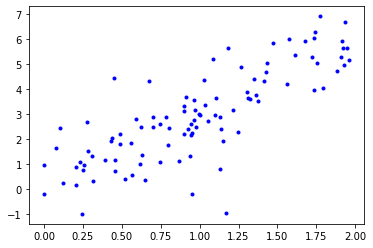

In [46]:
plt.plot(x1,y,'b.')

In [62]:
alpha = 0.1
n_iter = 1000000

# y = m*x

## with hand-crafted gradient

In [63]:
w_iter = np.random.randn(1,1)
w_old = w_iter

for i in range(n_iter):
    temp = np.matmul(x1,w_old) - y
    grad = 2*np.matmul(x1.T,temp)/x1.shape[0]
    w_old = w_old - alpha*grad
    
print(w_old)

[[2.94482089]]


## Scipy minimize

In [75]:
def fun_error(w):
    diff = np.matmul(w,x1.T)-y.T
    mul = np.matmul(diff,diff.T)
    return mul[0][0]

In [79]:
def fun_grad_error(w):
    grad_val = 2*np.matmul( np.matmul(w, x1.T) - y.T, x1 )/x1.shape[0]
    return np.concatenate(grad_val)

In [80]:
res = minimize(fun=fun_error, x0=w_iter, jac=fun_grad_error,method='BFGS')
print(res.x)

[2.94482089]


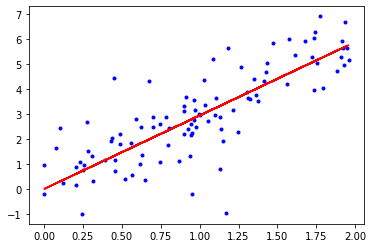

In [58]:
y1 = w_old*x1

plt.plot(x1,y,'b.')
plt.plot(x1,y1,'r-')

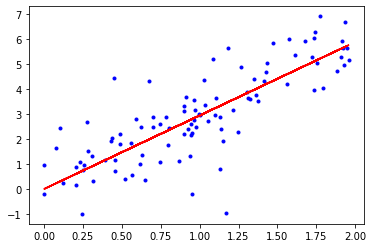

In [81]:
y1 = res.x*x1

plt.plot(x1,y,'b.')
plt.plot(x1,y1,'r-')

# y = m*x + c

In [82]:
w_iter = np.zeros((2,1))
w_old = w_iter

for i in range(n_iter):
    temp = np.matmul(x,w_old)-y
    grad = np.matmul(x.T,temp)/x.shape[0]
    w_new = w_old - alpha*grad
    w_old = w_new
    
print(w_old)

(100, 2) (2, 1) (100, 1)
[[2.77069885]
 [0.22113325]]


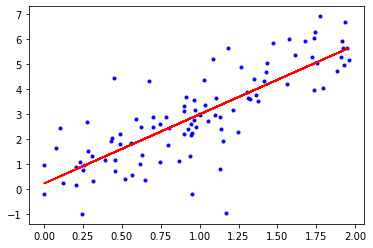

In [85]:
y1 = np.matmul(x,w_old)
plt.plot(x1,y,'b.')
plt.plot(x1,y1,'r-')

In [89]:
def fun_error(w):
    diff = np.matmul(w,x.T)-y.T
    mul = np.matmul(diff,diff.T)
    return mul[0][0]

In [90]:
def fun_grad_error(w):
    grad_val = 2*np.matmul( np.matmul(w, x.T) - y.T, x )/x.shape[0]
    return np.concatenate(grad_val)

In [91]:
res = minimize(fun=fun_error, x0=w_iter, jac=fun_grad_error,method='BFGS')
print(res.x)

[2.77069993 0.22113216]


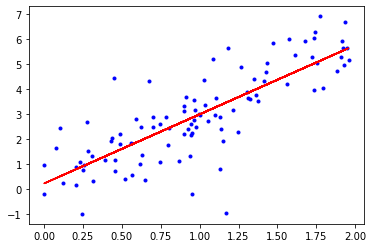

In [94]:
y1 = np.matmul(x,res.x)
plt.plot(x1,y,'b.')
plt.plot(x1,y1,'r-')

# y = a*x^2 + b*x + c

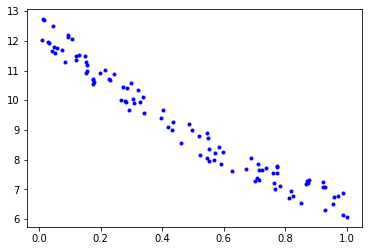

In [147]:
x1 = np.random.rand(100,1)
y = 3 * x1*x1 - 9 * (x1) +12 + np.random.rand(100,1)

plt.plot(x1,y,'b.')

In [148]:
x3 = np.concatenate((np.square(x1),x1),axis =1 )
ones_col = np.ones((100,1))
x2 = np.concatenate((x3,ones_col),axis = 1)

In [149]:
alpha = 0.1
n_iter = 10000
w_iter = np.random.rand(3,1)

w_old = w_iter

for i in range(n_iter):
    temp = np.matmul(x2,w_old)-y
    grad = np.matmul(x2.T,temp)/x2.shape[0]
    w_new = w_old - alpha*grad
    w_old = w_new
    
print(w_old)

[[ 2.62247977]
 [-8.540585  ]
 [12.3890242 ]]


plt.plot(x1,y,'b.')

y1 = np.matmul(x2,w_old)

plt.plot(x1,y1,'r.')

In [160]:
def fun_error(w):
    diff = np.matmul(w,x2.T)-y.T
    mul = np.matmul(diff,diff.T)
    return mul[0][0]

In [163]:
def fun_grad_error(w):
    grad_val = 2*np.matmul( np.matmul(w, x2.T) - y.T, x2 )/x2.shape[0]
    return np.concatenate(grad_val)

In [164]:
res = minimize(fun=fun_error, x0=w_iter, jac=fun_grad_error,method='BFGS')
print(res.x)

[ 3.01001953 -8.93144043 12.45099094]


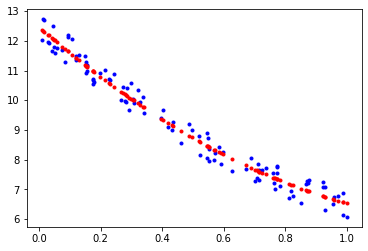

In [165]:
plt.plot(x1,y,'b.')

y1 = np.matmul(x2,res.x)

plt.plot(x1,y1,'r.')

## For K degree polynomial

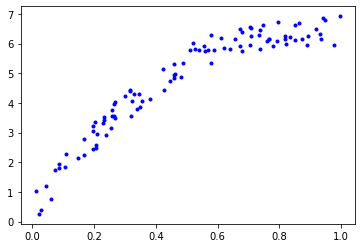

In [166]:
x1 = np.random.rand(100,1)
k = 6 #assume k is 6
y = 3 * x1**k - 9 * (x1)**3 +12*x1 + np.random.rand(100,1)

plt.plot(x1,y,'b.')

### Concatenating and forming X array

In [177]:
def gen_Xmatrix(k):
    X = np.power(x1,k)
    k-=1
    while(k>=1):
        temp = np.power(x1,k)
        temp1 = X
        X = np.concatenate((temp1,temp),axis=1)
        k-=1
    ones_col = np.ones(100).reshape(-1,1)
    temp2 = X
    X = np.concatenate((temp2,ones_col),axis=1)
    return X


In [178]:
xk = gen_Xmatrix(6)
print(xk.shape)

(100, 7)


In [179]:
alpha = 0.1
n_iter = 10000
w_iter = np.random.rand(7,1)

w_old = w_iter

for i in range(n_iter):
    temp = np.matmul(xk,w_old)-y
    grad = np.matmul(xk.T,temp)/xk.shape[0]
    w_new = w_old - alpha*grad
    w_old = w_new
    
print(w_old)

[[ 0.77063449]
 [-0.34160015]
 [-2.23056979]
 [-2.33786235]
 [-0.4115086 ]
 [ 9.70209237]
 [ 0.96723771]]


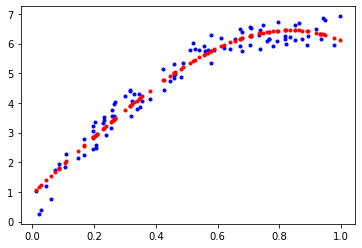

In [180]:
plt.plot(x1,y,'b.')

y1 = np.matmul(xk,w_old)

plt.plot(x1,y1,'r.')

In [181]:
def fun_error(w):
    diff = np.matmul(w,xk.T)-y.T
    mul = np.matmul(diff,diff.T)
    return mul[0][0]

In [182]:
def fun_grad_error(w):
    grad_val = 2*np.matmul( np.matmul(w, xk.T) - y.T, xk )/xk.shape[0]
    return np.concatenate(grad_val)

In [183]:
res = minimize(fun=fun_error, x0=w_iter, jac=fun_grad_error,method='BFGS')
print(res.x)

[ 39.72392279 -53.72359358 -20.62817312  60.10217276 -37.58212675
  18.61999386   0.29757322]


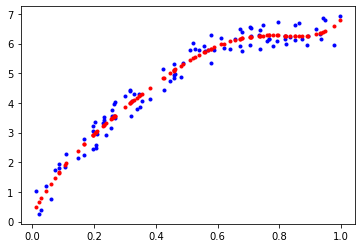

In [184]:
plt.plot(x1,y,'b.')

y1 = np.matmul(xk,res.x)

plt.plot(x1,y1,'r.')